Import libraries

In [21]:
import math
import pandas as pd
import numpy as np
import soundfile as sf
from matplotlib import pyplot as plt
import wave
import contextlib
import librosa
import librosa.display as libdis


path = '../../res/dataset/train/'

Define function

In [2]:
def get_wav_len(filename=""):
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        return duration

get paths

In [4]:
df_paths_audio = pd.read_csv(path + 'audio_train.csv')
paths = []
for filename in df_paths_audio['filename']:
    paths.append(path + 'audio/' + filename)
#print(paths)

Get lengths

In [11]:
lengths = []
for path in paths:
    file = sf.SoundFile(path)
    length = file.frames/file.samplerate
    lengths.append(length)

Create plot

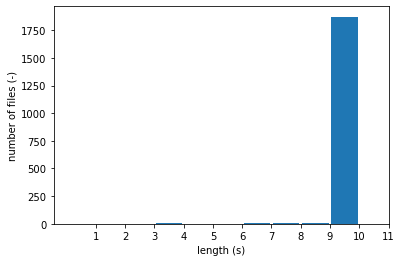

In [6]:
top = math.ceil(max(lengths))
plt.hist(lengths, bins=range(0, top, 1), rwidth=0.9)
plt.xticks(range(1, top+1, 1))
plt.xlabel('length (s)')
plt.ylabel('number of files (-)')
plt.show()

Count lengths

In [7]:
lencount = np.zeros(int(max(lengths))+2)
for i in range(len(lencount)):
    for l in lengths:
        if l >= i and l < i + 1:
            lencount[i] += 1
print({c: int(v) for c, v in enumerate(lencount)})

{0: 0, 1: 0, 2: 0, 3: 3, 4: 0, 5: 2, 6: 4, 7: 4, 8: 8, 9: 194, 10: 1744, 11: 0}


more zoomed plot

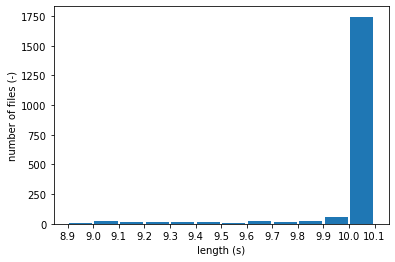

In [8]:
bins = [i/10 for i in range(89, 102, 1)]
plt.hist(lengths, bins=bins, rwidth=0.9)
plt.xticks(bins)
plt.xlabel('length (s)')
plt.ylabel('number of files (-)')
plt.show()

more zoomed plot (without 10.0s)

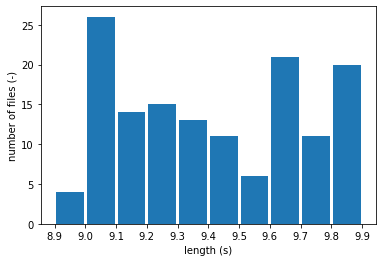

In [9]:
bins = [i/10 for i in range(89, 100, 1)]
plt.hist(lengths, bins=bins, rwidth=0.9)
plt.xticks(bins)
plt.xlabel('length (s)')
plt.ylabel('number of files (-)')
plt.show()

Load in an audio file

In [36]:
num_of_file = 40

y, sr = librosa.load(paths[num_of_file], sr=None)

Waveform of single random file

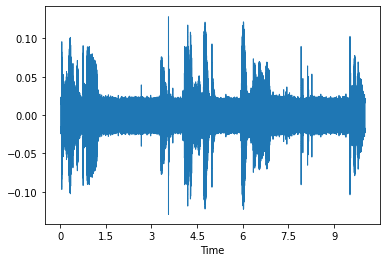

In [53]:
fig, ax = plt.subplots()

libdis.waveshow(y, sr=sr, ax=ax)
plt.show()

melspectrogram

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

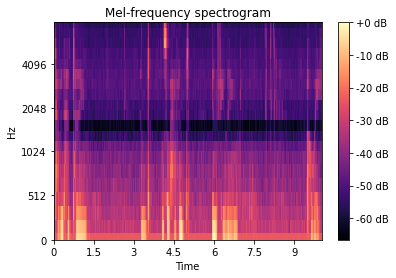

In [59]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=1024, fmax=sr/2, n_mels=20)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=sr/2, ax=ax)

MFCC

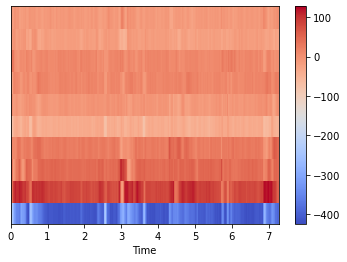

In [61]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)